# Lab 1: Python Pandas

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

### Python

In [2]:
alist = [1, 2, 3, 4, 5]
asquarelist = [i*i for i in alist]
asquarelist

[1, 4, 9, 16, 25]

In [3]:
enumerate(asquarelist)

In [4]:
[k for k in enumerate(asquarelist)]

[(0, 1), (1, 4), (2, 9), (3, 16), (4, 25)]

In [5]:
zip(alist, asquarelist)

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

In [9]:
'''
hamletfile = open("hamlet.txt")
hamlettext = hamletfile.read()
hamletfile.close()
hamlettokens = hamlettext.split()
len(hamlettokens)
'''

'\nhamletfile = open("hamlet.txt")\nhamlettext = hamletfile.read()\nhamletfile.close()\nhamlettokens = hamlettext.split()\nlen(hamlettokens)\n'

In [10]:
with open("hamlet.txt") as hamletfile:
    hamlettext = hamletfile.read()
    hamlettokens = hamlettext.split()
    print len(hamlettokens)

31659


In [19]:
adict = {'one':1, 'two':2, 'three':3}
print [i for i in adict], [(k,v) for k, v in adict.items()], adict.values()

['three', 'two', 'one'] [('three', 3), ('two', 2), ('one', 1)] [3, 2, 1]


In [21]:
mydict = {k:v for (k,v) in zip(alist, asquarelist)}
print mydict

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}


In [22]:
import json

In [24]:
s = json.dumps(mydict)
print s

{"1": 1, "2": 4, "3": 9, "4": 16, "5": 25}


In [25]:
json.loads(s)

{u'1': 1, u'2': 4, u'3': 9, u'4': 16, u'5': 25}

In [30]:
x = [i + 1 for i in range(10)]
y = [i*i*i for i in x]
z = {k:v for k,v in zip(x, y)}
print z

{1: 1, 2: 8, 3: 27, 4: 64, 5: 125, 6: 216, 7: 343, 8: 512, 9: 729, 10: 1000}


In [31]:
a = [1, 2, 3, 4, 5]
1 in a

True

In [33]:
hamletlctokens = [word.lower() for word in hamlettokens]
hamletlctokens.count("thou")

95

In [37]:
uniquelctokens = set(hamletlctokens)
tokendict = {}
for ut in uniquelctokens:
    tokendict[ut] = hamletlctokens.count(ut)
L = sorted(tokendict.iteritems(), key = lambda(k, v): v, reverse = True)
L[:30]

[('the', 1136),
 ('and', 943),
 ('to', 720),
 ('of', 667),
 ('a', 527),
 ('my', 512),
 ('i', 510),
 ('in', 420),
 ('you', 412),
 ('ham.', 358),
 ('that', 337),
 ('it', 324),
 ('is', 320),
 ('his', 295),
 ('not', 270),
 ('with', 264),
 ('this', 250),
 ('your', 241),
 ('for', 231),
 ('but', 228),
 ('as', 216),
 ('he', 202),
 ('be', 201),
 ('what', 183),
 ('have', 174),
 ('will', 149),
 ('so', 143),
 ('me', 142),
 ('we', 132),
 ('do', 128)]

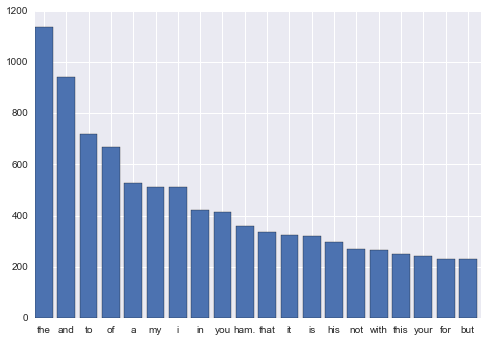

In [45]:
topfreq = L[:20]
pos = np.arange(len(topfreq))
plt.bar(pos, [e[1] for e in topfreq]);
plt.xticks(pos + 0.4, [e[0] for e in topfreq]);

### Pandas

In [70]:
df = pd.read_csv("all.csv", header=None, 
                 names=["rating", "review_count", "isbn", "booktype", "author_url", "year", 
                        "genre_urls", "dir", "rating_count", "name"])
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


In [47]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [48]:
df.shape

(6000, 10)

In [49]:
df.columns

Index([u'rating', u'review_count', u'isbn', u'booktype', u'author_url', u'year', u'genre_urls', u'dir', u'rating_count', u'name'], dtype='object')

In [50]:
type(df), type(df.rating)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [51]:
np.sum(df.rating < 3)

4

In [52]:
np.sum(df.rating < 3) / float(df.shape[0])

0.00066666666666666664

In [56]:
np.mean(df.rating < 3)

0.00066666666666666664

In [58]:
(df.rating < 3).mean()

0.00066666666666666664

In [57]:
df[df.rating < 3]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2609,2.90,8,NaN,good_reads:book,https://www.goodreads.com/author/show/7707820....,2013,/genres/romance|/genres/realistic-fiction|/gen...,dir27/19546932-how-to-be-a-perfect-girl.html,31,How To Be A Perfect Girl
3738,2.00,368,0983650322,good_reads:book,https://www.goodreads.com/author/show/9414.Vic...,2011,/genres/young-adult|/genres/science-fiction|/g...,dir38/12393909-revealing-eden.html,688,"Revealing Eden (Save the Pearls, #1)"
5844,2.97,1399,0395083621,good_reads:book,https://www.goodreads.com/author/show/30691.Ad...,1925,/genres/history|/genres/non-fiction|/genres/bi...,dir59/54270.Mein_Kampf.html,12417,Mein Kampf
5979,2.77,800,0060988649,good_reads:book,https://www.goodreads.com/author/show/7025.Gre...,2001,/genres/fantasy|/genres/fiction|/genres/myster...,dir60/24929.Lost.html,11128,Lost


In [59]:
df.query("rating > 4.5")

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
17,4.58,1314,0345538374,good_reads:book,https://www.goodreads.com/author/show/656983.J...,1973,/genres/fantasy|/genres/classics|/genres/scien...,dir01/30.J_R_R_Tolkien_4_Book_Boxed_Set.html,68495,J.R.R. Tolkien 4-Book Boxed Set
162,4.55,15777,075640407X,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2007,/genres/fantasy|/genres/fiction,dir02/186074.The_Name_of_the_Wind.html,210018,The Name of the Wind (The Kingkiller Chronicle...
222,4.53,15256,055357342X,good_reads:book,https://www.goodreads.com/author/show/346732.G...,2000,/genres/fantasy|/genres/fiction|/genres/fantas...,dir03/62291.A_Storm_of_Swords.html,327992,"A Storm of Swords (A Song of Ice and Fire, #3)"
242,4.53,5404,0545265355,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2010,/genres/young-adult|/genres/fiction|/genres/fa...,dir03/7938275-the-hunger-games-trilogy-boxset....,102330,The Hunger Games Trilogy Boxset (The Hunger Ga...
249,4.80,644,0740748475,good_reads:book,https://www.goodreads.com/author/show/13778.Bi...,2005,/genres/sequential-art|/genres/comics|/genres/...,dir03/24812.The_Complete_Calvin_and_Hobbes.html,22674,The Complete Calvin and Hobbes
284,4.58,15195,1406321346,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2013,/genres/fantasy|/genres/young-adult|/genres/fa...,dir03/18335634-clockwork-princess.html,130161,"Clockwork Princess (The Infernal Devices, #3)"
304,4.54,572,0140259449,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1933,/genres/classics|/genres/fiction|/genres/roman...,dir04/14905.The_Complete_Novels.html,17539,The Complete Novels
386,4.55,8820,0756404738,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2011,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir04/1215032.The_Wise_Man_s_Fear.html,142499,"The Wise Man's Fear (The Kingkiller Chronicle,..."
400,4.53,9292,1423140605,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2012,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/12127750-the-mark-of-athena.html,128412,"The Mark of Athena (The Heroes of Olympus, #3)"
475,4.57,824,1416997857,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2009,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/6485421-the-mortal-instruments-boxed-set...,39720,The Mortal Instruments Boxed Set (The Mortal I...


In [60]:
df[df.year < 0]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
47,3.68,5785,0143039954,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800,/genres/classics|/genres/fiction|/genres/poetr...,dir01/1381.The_Odyssey.html,560248,The Odyssey
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
455,3.85,1499,0140449140,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-380,/genres/philosophy|/genres/classics|/genres/no...,dir05/30289.The_Republic.html,82022,The Republic
596,3.77,1240,0679729526,good_reads:book,https://www.goodreads.com/author/show/919.Virgil,-29,/genres/classics|/genres/poetry|/genres/fictio...,dir06/12914.The_Aeneid.html,60308,The Aeneid
629,3.64,1231,1580495931,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-429,/genres/classics|/genres/plays|/genres/drama|/...,dir07/1554.Oedipus_Rex.html,93192,Oedipus Rex
674,3.92,3559,1590302257,good_reads:book,https://www.goodreads.com/author/show/1771.Sun...,-512,/genres/non-fiction|/genres/politics|/genres/c...,dir07/10534.The_Art_of_War.html,114619,The Art of War
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
777,3.52,1038,1580493882,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-442,/genres/drama|/genres/fiction|/genres/classics...,dir08/7728.Antigone.html,49084,Antigone
1233,3.94,704,015602764X,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-400,/genres/classics|/genres/plays|/genres/drama|/...,dir13/1540.The_Oedipus_Cycle.html,36008,The Oedipus Cycle
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables


In [64]:
df[(df.year < 0) & (df.rating > 4)]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables
1882,4.02,377,0872205541,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400,/genres/philosophy|/genres/classics|/genres/no...,dir19/22632.The_Trial_and_Death_of_Socrates.html,18712,The Trial and Death of Socrates
3133,4.30,131,0872203492,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400,/genres/philosophy|/genres/classics|/genres/no...,dir32/9462.Complete_Works.html,7454,Complete Works
4475,4.11,281,0865163480,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-390,/genres/philosophy|/genres/classics|/genres/no...,dir45/73945.Apology.html,11478,Apology
5367,4.07,133,0872206335,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-360,/genres/philosophy|/genres/classics|/genres/no...,dir54/30292.Five_Dialogues.html,9964,Five Dialogues


In [71]:
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


In [72]:
df = df[df.year.notnull()]
df.shape

(5993, 10)

In [73]:
df['rating_count'] = df.rating_count.astype(int)
df['review_count'] = df.review_count.astype(int)
df['year'] = df.year.astype(int)
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

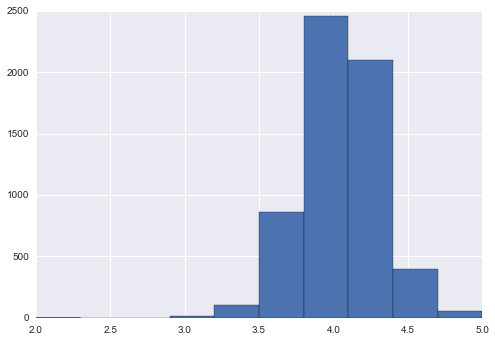

In [75]:
df.rating.hist();

In [78]:
sns.set_context("notebook")
meanrat = df.rating.mean()
print meanrat, np.mean(df.rating), df["rating"].median()

4.04199733022 4.04199733022 4.05


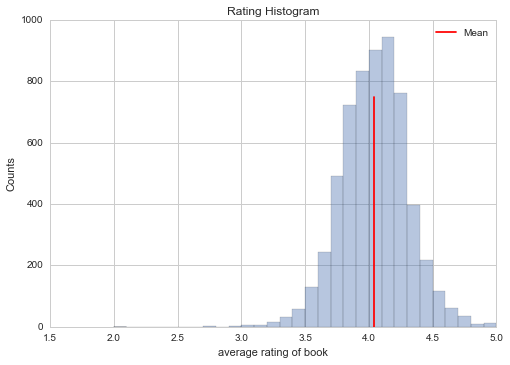

In [82]:
with sns.axes_style("whitegrid"):
    df.rating.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel("average rating of book")
    plt.ylabel("Counts")
    plt.title("Rating Histogram")
    plt.legend()

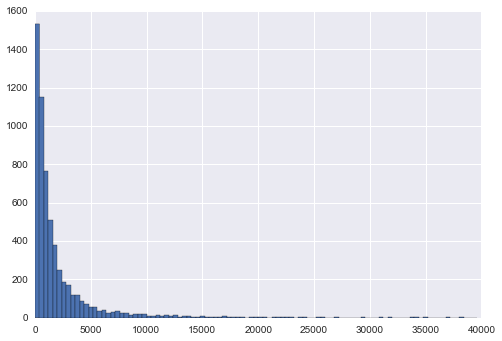

In [85]:
df.review_count.hist(bins=np.arange(0, 40000, 400));

In [90]:
df.review_count.describe()

count      5993.000000
mean       2374.331220
std        5493.093328
min           0.000000
25%         390.000000
50%         936.000000
75%        2212.000000
max      136455.000000
Name: review_count, dtype: float64

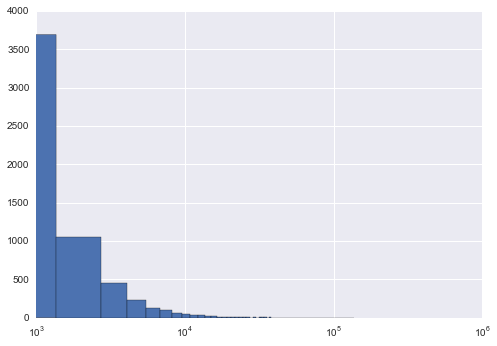

In [94]:
df.review_count.hist(bins=100)
plt.xscale("log");

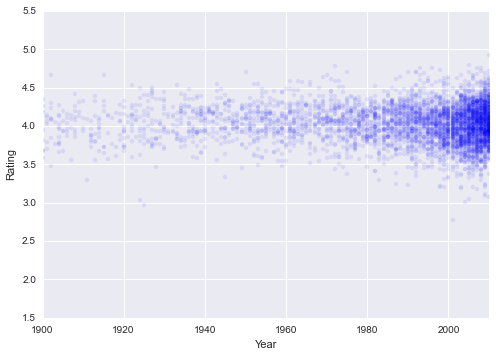

In [95]:
plt.scatter(df.year, df.rating, lw=0, alpha=.08)
plt.xlim([1900, 2010])
plt.xlabel("Year")
plt.ylabel("Rating")

### np array vs. python list

In [96]:
alist = [1 ,2 , 3, 4, 5]

In [97]:
alist + alist

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [98]:
np.array(alist)

array([1, 2, 3, 4, 5])

In [99]:
np.array(alist) + np.array(alist)

array([ 2,  4,  6,  8, 10])

In [100]:
np.array(alist) ** 2

array([ 1,  4,  9, 16, 25])